## Imports

In [3]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
iris = datasets.load_iris()
digits = datasets.load_digits()

## Configurations

In [6]:
X = digits.data
num_examples = X.shape[0]
num_features = X.shape[1]

k = 10
dist = "squared-l2"   # Choices: euclidean, squared-l2, 

# Allocate memory for the centroids
centroids = np.zeros((k, num_features))

# Allocate a data structure for the assignments
assignments = np.zeros(num_examples, dtype=np.int32)

In [8]:
# X[0].shape

(64,)

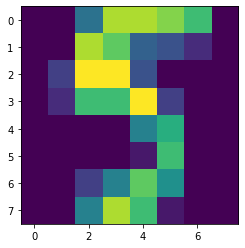

In [11]:
plt.imshow(X[302].reshape((8,8)))

## Set the distance function

In [12]:
def distance(x,y):
    return np.dot(x - y, x - y)

In [15]:
print(distance(X[0], X[1]))
print(distance(X[1], X[2]))

3547.0
1733.0


In [16]:
num_examples

1797

## Initiaize the centroids

In [17]:
random_points = np.random.permutation(num_examples)[:k]
print(random_points)

[1144 1560 1134  876 1639 1356 1054  463 1425 1119]


In [18]:
for i in range(k):
    centroids[i, :] = X[random_points[i]]

In [19]:
print(centroids)

[[ 0.  0. 10. 16. 15.  8.  2.  0.  0.  9. 16. 12.  8.  9.  3.  0.  0. 13.
  16.  9.  0.  0.  0.  0.  0.  7. 16. 16. 10.  0.  0.  0.  0.  7. 13.  8.
  16.  4.  0.  0.  0.  0.  0.  1. 16.  5.  0.  0.  0.  0.  2. 12. 15.  1.
   0.  0.  0.  0. 13. 16.  6.  0.  0.  0.]
 [ 0.  0.  4. 13. 16. 14.  0.  0.  0.  2. 14. 16. 12.  4.  0.  0.  0. 13.
  16.  5.  0.  0.  0.  0.  0. 11. 16. 10.  1.  0.  0.  0.  0.  5. 15. 16.
   5.  0.  0.  0.  0.  0.  2. 15.  9.  0.  0.  0.  0.  0.  5. 15.  9.  0.
   0.  0.  0.  0.  4. 16.  5.  0.  0.  0.]
 [ 0.  0.  3. 16. 12.  2.  0.  0.  0.  0.  6. 16. 16.  3.  0.  0.  0.  0.
   9. 16. 16.  0.  0.  0.  0.  0.  9. 16. 16.  1.  0.  0.  0.  0.  9. 16.
  16.  0.  0.  0.  0.  0.  9. 16. 13.  0.  0.  0.  0.  0.  7. 16. 13.  0.
   0.  0.  0.  0.  3. 14. 16.  3.  0.  0.]
 [ 0.  0.  0.  1. 13.  2.  0.  0.  0.  0.  0. 12. 14.  0.  0.  0.  0.  0.
   6. 14.  0.  0.  0.  0.  0.  1. 14.  5.  0.  0.  0.  0.  0.  9. 12.  0.
  12.  7.  0.  0.  0. 12. 14.  6. 16. 14.  1.  0.  0.  6.

## Step 1 
Assign each point to the cluster corresponding to the nearest centroid

In [35]:
def update_assignments(X, centroids, assignments):
    for i in range(num_examples):
        distances = np.zeros(k)
        for j in range(k):
            distances[j] = distance(X[i], centroids[j])
        assignments[i] = np.argmin(distances)

In [37]:
# update_assignments(X, centroids, assignments)
# print(assignments)

## Step 2 
Update the cluster centers

In [38]:
def update_centroids(X, centroids, assignments):
    for j in range(k):
        centroids[j,:] = np.mean(X[np.where(assignments == j)], axis=0)


## Step 3
Calculate the loss based on the current cluster assignments.




In [20]:
def loss(X, centroids, assignments):
    loss = 0
    for j in range(k):
        A = X[np.where(assignments == j)]
        for i in range(len(A)):
            loss += distance(A[i], centroids[j])
    return loss

## Step 4 
Put it all together!

In [42]:
cost = loss(X, centroids, assignments)
prev_cost = cost + 1
counter = 0
print("Epoch:", counter, "Cost: ", cost) 

while prev_cost > cost:
    counter += 1
    prev_cost = cost
    
    update_assignments(X, centroids, assignments)
    update_centroids(X, centroids, assignments)
    cost = loss(X, centroids, assignments)
    print("Epoch:", counter, "Cost:", cost) 
    #     if loss == prev_cost:
    
print("The k-means algorithm has converged")

Epoch: 0 Cost:  2483189.0
Epoch: 1 Cost: 1466927.0955716746
Epoch: 2 Cost: 1283795.1950632513
Epoch: 3 Cost: 1246201.0257234892
Epoch: 4 Cost: 1231698.7714228553
Epoch: 5 Cost: 1216817.2319894626
Epoch: 6 Cost: 1201518.3006583788
Epoch: 7 Cost: 1190127.9153669581
Epoch: 8 Cost: 1183341.9769776526
Epoch: 9 Cost: 1177961.904753619
Epoch: 10 Cost: 1174902.872938588
Epoch: 11 Cost: 1173648.0286182195
Epoch: 12 Cost: 1172829.1371840497
Epoch: 13 Cost: 1172243.6724236184
Epoch: 14 Cost: 1171964.602104043
Epoch: 15 Cost: 1171600.086721224
Epoch: 16 Cost: 1171416.5661407758
Epoch: 17 Cost: 1171416.5661407758
The k-means algorithm has converged
